In [ ]:
# TODO
# Load Dataset
# Remove outliers
# Check distribution
# Deal with Null values
# Test with LR?

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 90 kB/s 


In [ ]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from category_encoders import TargetEncoder, OneHotEncoder
from yellowbrick.regressor import ResidualsPlot
%matplotlib inline

# Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = '/content/drive/MyDrive/realtor-data.csv'

In [ ]:
data = pd.read_csv(data_dir)
data.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [ ]:
data.dtypes

status           object
price           float64
bed             float64
bath            float64
acre_lot        float64
full_address     object
street           object
city             object
state            object
zip_code        float64
house_size      float64
sold_date        object
dtype: object

In [ ]:
# duplicate values
data.duplicated().sum()

809370

In [ ]:
# drop duplicate values
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(113789, 12)

In [ ]:
data.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,1.137710e+05,96273.000000,97492.000000,82666.000000,113756.000000,7.734100e+04
mean,9.096064e+05,3.308789,2.521181,17.739735,8267.082677,2.162737e+03
std,3.418918e+06,1.858004,1.730873,981.810193,4581.526158,5.845521e+03
min,0.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02
25%,2.500000e+05,2.000000,2.000000,0.110000,6010.000000,1.152000e+03
50%,4.499000e+05,3.000000,2.000000,0.260000,8005.000000,1.664000e+03
75%,8.000000e+05,4.000000,3.000000,1.030000,10301.000000,2.499000e+03
max,8.750000e+08,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06


In [ ]:
# drop columns that won't be used
data = data.drop(["status", "acre_lot", "full_address", "street", "sold_date"], axis=1)

In [ ]:
# missing values
data.isnull().sum()

price            18
bed           17516
bath          16297
city             23
state             0
zip_code         33
house_size    36448
dtype: int64

In [ ]:
# drop missing values
data.dropna(how='any', inplace=True)

In [ ]:
data.isnull().sum()

price         0
bed           0
bath          0
city          0
state         0
zip_code      0
house_size    0
dtype: int64

In [ ]:
data.shape

(74097, 7)

In [ ]:
# remove outlier (greater than 3 standard deviations)
data = data[np.abs(stats.zscore(data['price'])) < 3]
data = data[np.abs(stats.zscore(data['bed'])) < 3]
data = data[np.abs(stats.zscore(data['bath'])) < 3]
data = data[np.abs(stats.zscore(data['house_size'])) < 3]
data.shape

(71443, 7)

In [ ]:
data.describe()

,price,bed,bath,zip_code,house_size
count,7.144300e+04,71443.000000,71443.000000,71443.000000,71443.000000
mean,7.916941e+05,3.142225,2.388086,8436.249780,1913.139230
std,1.150525e+06,1.299402,1.123725,5078.803213,1136.629054
min,5.000000e+02,1.000000,1.000000,601.000000,100.000000
25%,2.749000e+05,2.000000,2.000000,5152.000000,1152.000000
50%,4.500000e+05,3.000000,2.000000,8033.000000,1618.000000
75%,7.990000e+05,4.000000,3.000000,10522.000000,2373.000000
max,1.311800e+07,8.000000,6.000000,95652.000000,19110.000000


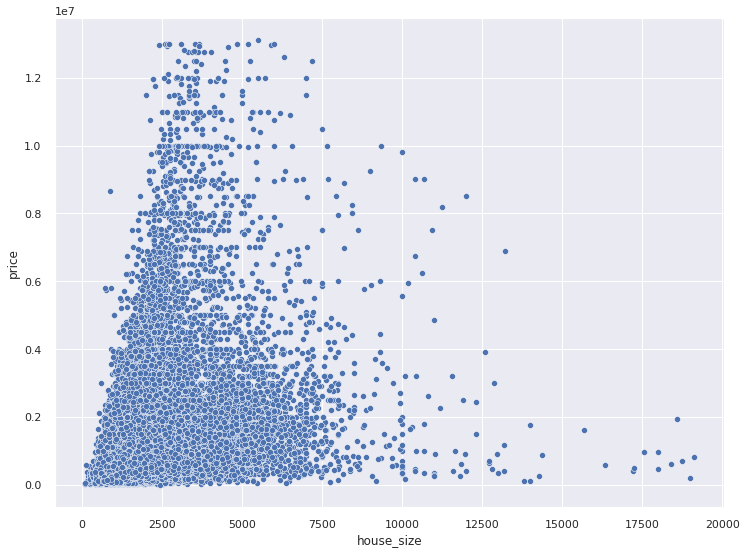

In [ ]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.scatterplot(data = data, x='house_size', y='price')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


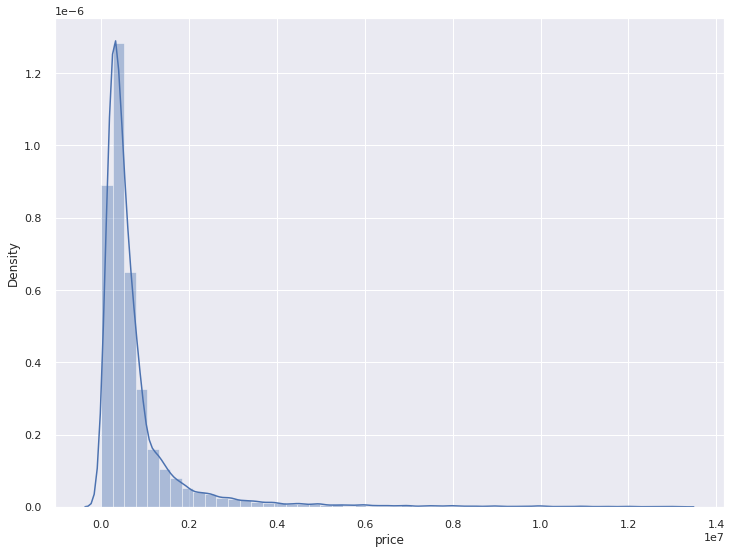

In [ ]:
sns.distplot(data.price)

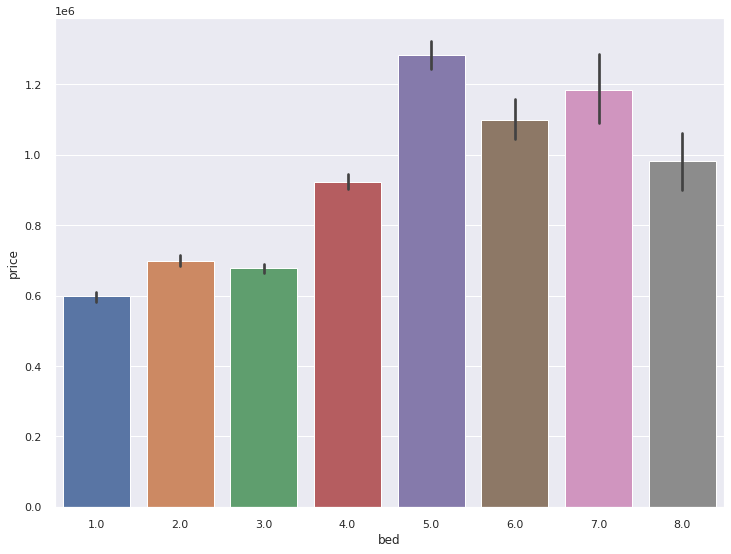

In [ ]:
sns.barplot(x=data.bed , y=data.price)

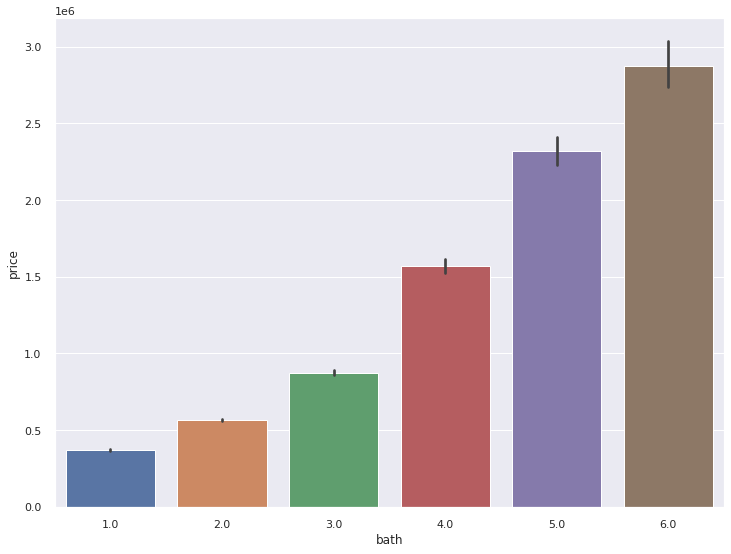

In [ ]:
sns.barplot(x=data.bath , y=data.price)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

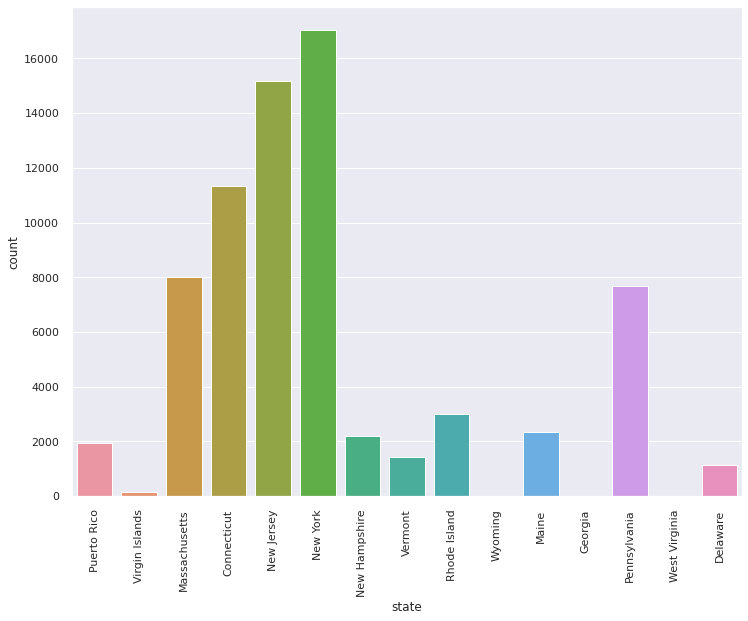

In [ ]:
sns.countplot(data.state)
plt.xticks(rotation=90)

In [ ]:
data[data.state=='Virgin Islands'].price.mean()

1359197.09352518

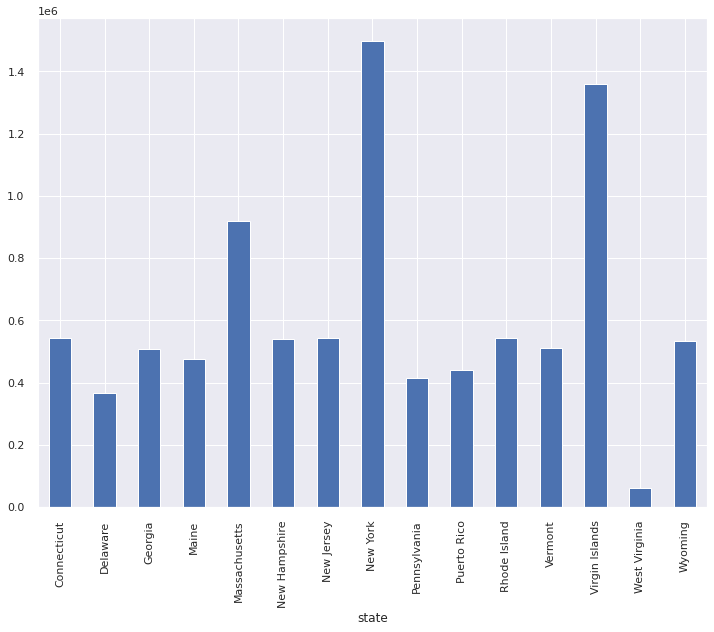

In [ ]:
data.groupby("state")["price"].mean().round(2).plot(kind="bar")

In [ ]:
# Virgin Islands has very less data but a high average price.
# West Virginia has very less data but a low average price.
# drop data in these two states
data = data[data.state != 'Virgin Islands']
data = data[data.state != 'West Virginia']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

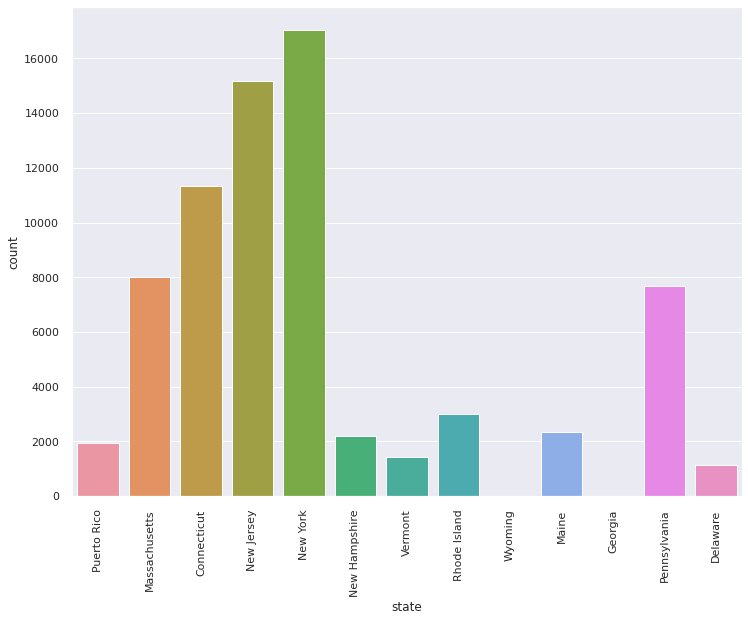

In [ ]:
sns.countplot(data.state)
plt.xticks(rotation=90)

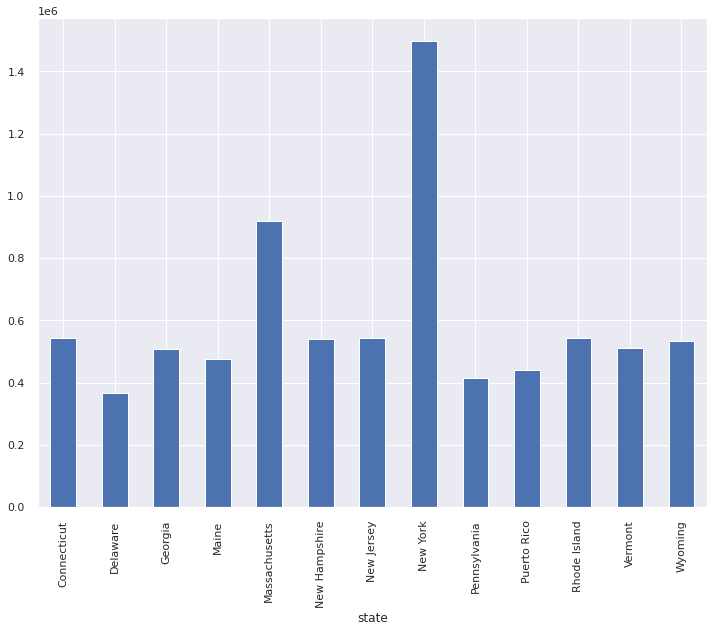

In [ ]:
data.groupby("state")["price"].mean().plot(kind='bar', y='price')

In [ ]:
data.head()

,price,bed,bath,city,state,zip_code,house_size
0,105000.0,3.0,2.0,Adjuntas,Puerto Rico,601.0,920.0
1,80000.0,4.0,2.0,Adjuntas,Puerto Rico,601.0,1527.0
2,67000.0,2.0,1.0,Juana Diaz,Puerto Rico,795.0,748.0
3,145000.0,4.0,2.0,Ponce,Puerto Rico,731.0,1800.0
5,179000.0,4.0,3.0,San Sebastian,Puerto Rico,612.0,2520.0


In [ ]:
data["zip_code"] = data["zip_code"].apply(str)

In [ ]:
# target encoding
data["city_enc"] = TargetEncoder().fit_transform(data["city"], data["price"])
data["zip_enc"] = TargetEncoder().fit_transform(data["zip_code"], data["price"])

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:124: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:129: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
# one hot encoding
states_encoded = OneHotEncoder(use_cat_names=True).fit_transform(data["state"])
data = pd.concat([data, states_encoded], axis=1)

In [ ]:
data = data.drop(["city","state","zip_code"], axis=1)
data.head()

,price,bed,bath,house_size,city_enc,zip_enc,state_Puerto Rico,state_Massachusetts,state_Connecticut,state_New Jersey,state_New York,state_New Hampshire,state_Vermont,state_Rhode Island,state_Wyoming,state_Maine,state_Georgia,state_Pennsylvania,state_Delaware
0,105000.0,3.0,2.0,920.0,280247.482950,280247.482950,1,0,0,0,0,0,0,0,0,0,0,0,0
1,80000.0,4.0,2.0,1527.0,280247.482950,280247.482950,1,0,0,0,0,0,0,0,0,0,0,0,0
2,67000.0,2.0,1.0,748.0,114611.845711,113752.971131,1,0,0,0,0,0,0,0,0,0,0,0,0
3,145000.0,4.0,2.0,1800.0,199673.107143,168305.581318,1,0,0,0,0,0,0,0,0,0,0,0,0
5,179000.0,4.0,3.0,2520.0,196619.034149,144958.974359,1,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.shape

(71303, 19)

In [ ]:
# file_path= '/content/drive/MyDrive/data_cleaned.csv'
# data.to_csv(file_path)

# Initial Model Training

In [ ]:
from sklearn.linear_model import LinearRegression  
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [ ]:
X = data.drop(columns="price")           
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (57042, 18)
X Test  :  (14261, 18)
Y Train :  (57042,)
Y Test  :  (14261,)


In [ ]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))
print("Linear Regression R2:", r2_score(y_test, y_pred))

Linear Regression MSE: 528109443953.5501
Linear Regression R2: 0.6209409681818303


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


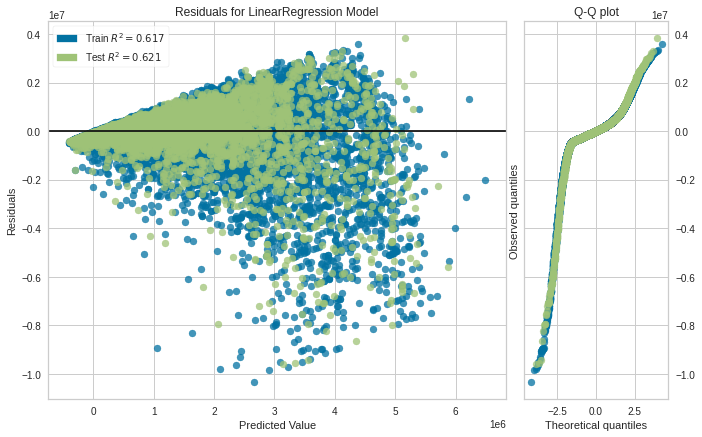

In [ ]:
visualizer = ResidualsPlot(LR, hist=False, qqplot=True, size=(800, 500))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
RidgeReg = Ridge()
RidgeReg.fit(X_train, y_train)
y_pred = RidgeReg.predict(X_test)
print("Ridge Regression:", mean_squared_error(y_test, y_pred))

Linear Regression: 528110066195.1222


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.55047e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
LassoReg = Lasso()
LassoReg.fit(X_train, y_train)
y_pred = LassoReg.predict(X_test)
print("Lasso Regression:", r2_score(y_test, y_pred))

Linear Regression: 0.6209408781588512


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.543e+15, tolerance: 7.437e+12
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
EN = ElasticNet()
EN.fit(X_train, y_train)
y_pred = EN.predict(X_test)
print("Elastic Net Regression:", r2_score(y_test, y_pred))

Linear Regression: 0.6160006631913381


In [ ]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("Random Forest:", r2_score(y_test, y_pred))

Random Forest: 0.7280381217226688


In [ ]:
DT = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, min_samples_leaf=4)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("Random Forest:", r2_score(y_test, y_pred))

Random Forest: 0.802018125334105


In [ ]:
# polynomial regression
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X_train)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y_train)
y_pred = poly_reg_model.predict(poly.transform(X_test))
print("Polynomial Regression R2:", r2_score(y_test, y_pred))

Polynomial Regression R2: 0.7912316680341992


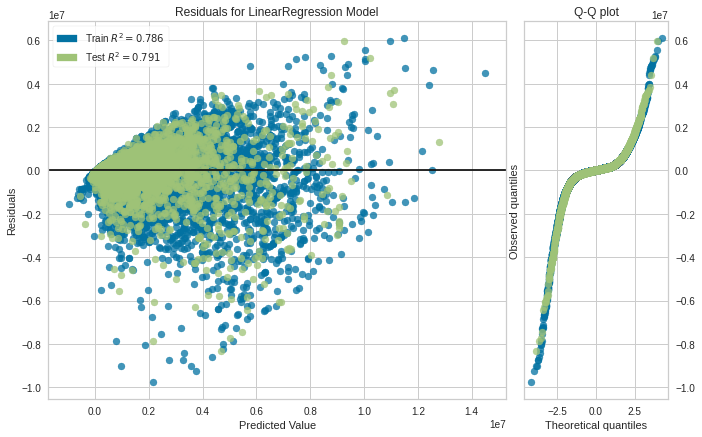

In [ ]:
visualizer = ResidualsPlot(poly_reg_model, hist=False, qqplot=True, size=(800, 500))
visualizer.fit(poly_features, y_train)
visualizer.score(poly.transform(X_test), y_test)
visualizer.show()

In [ ]:
!pip install apify_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
from apify_client import ApifyClient

# Initialize the ApifyClient with your API token
client = ApifyClient("apify_api_70HPExwJkrHrhkJho1k2cswsKRY5N611iQDM")

# Prepare the actor input
run_input = {
    "search": "Durham",
    "type": "all",
    "maxItems": 1000,
    "maxLevel": 1,
    "proxyConfiguration": { "useApifyProxy": True },
    "maxRetries": 6,
    "handlePageTimeoutSecs": 3600,
    "extendOutputFunction": """async ({ data, item, customData, Apify }) => {
    return item;
}""",
    "extendScraperFunction": """async ({ label, page, request, customData, Apify }) => {
    if (label === 'SETUP') {
        // before crawler.run()
    } else if (label === 'GOTO') {
        // inside handleGotoFunction
    } else if (label === 'HANDLE') {
        // inside handlePageFunction
    } else if (label === 'FINISH') {
        // after crawler.run()
    }
}""",
    "customData": {},
}

# Run the actor and wait for it to finish
run = client.actor("maxcopell/zillow-api-scraper").call(run_input=run_input)

# Fetch and print actor results from the run's dataset (if there are any)
result = []
for item in client.dataset(run["defaultDatasetId"]).iterate_items():
    result.append(item)

In [ ]:
print(len(result))
print(result[:100])

1000
[{'zpid': 60076921, 'address': {'streetAddress': '4407 McDermott Dr', 'city': 'Durham', 'state': 'NC', 'zipcode': '27705', 'neighborhood': None, 'community': None, 'subdivision': None}, 'bedrooms': 3, 'bathrooms': 2, 'price': 350000, 'yearBuilt': 1968, 'longitude': -79.02429, 'latitude': 36.05104, 'homeStatus': 'FOR_SALE', 'description': 'Lovely Estate Property with a Amazing Location. Located Close to I-85, Hillsborough.  Easy Access to UNC, Duke, RTP. Home Boasts a 2 Car Garage & Workshop Area w/Electricity and Lights to Support Many Buyer Hobbies or Business.  3+ Acres for Gardens, Horses Allowed, Play Area. Build a Detached Building.  The Land and the House Provide Endless Opportunities To Make This Property Your Own. Home Needs Updates. Sold As Is.', 'livingArea': 1712, 'currency': 'USD', 'homeType': 'SINGLE_FAMILY', 'datePostedString': '2022-11-15', 'daysOnZillow': 3, 'url': 'https://www.zillow.com/homedetails/4407-McDermott-Dr-Durham-NC-27705/60076921_zpid/', 'photos': ['ht